In [1]:
from openbb import obb
import matplotlib.pyplot as plt

import sys
sys.path.append(r'C:\Users\avido\Documents\other code\AlgoTrading')
from utils import local_data_interface as ldi
from assets.api_credentials import openbb_pat
obb.account.login(pat=openbb_pat, remember_me=True)

import indicators as inds
from indicators import pandas_ta_indicators as pti
from indicators import tulipy_indicators as ti
from indicators import modifiers as mods

from utils import ohlc_utils as ou

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = [12, 4]

In [2]:
df = ldi.get_local_ticker(symbol='SPY', start_date="1980-01-01", end_date='2025-03-10', interval='1d')

df.fillna(method='ffill', inplace=True)
print(len(df))
df.head()

8083


C:\Users\avido\AppData\Local\Temp\ipykernel_33652\263039922.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,open,high,low,close,volume,vwap,adj_close,unadjusted_volume,change,change_percent
date,,,,,,,,,,
1993-01-29,43.97,43.97,43.75,43.94,1003200,43.9075,24.53,1003200.0,-0.03080,-0.000682
1993-02-01,43.97,44.25,43.97,44.25,480500,44.1100,24.71,480500.0,0.28125,0.006368
1993-02-02,44.22,44.38,44.13,44.34,201300,44.2675,24.76,201300.0,0.12500,0.002714
1993-02-03,44.41,44.84,44.38,44.81,529400,44.6100,25.02,529400.0,0.40625,0.009007
1993-02-04,44.97,45.09,44.88,45.00,531500,44.9850,25.12,531500.0,0.03125,0.000667


In [7]:
indicators = [
    mods.differ(inds.SMA())
    ]
    
extractor = inds.Extractor(indicators)
new_df = extractor.extract(df)
new_df.head()

,open,high,low,close,volume,vwap,adj_close,unadjusted_volume,change,change_percent,"SMA(period=20,key=close)","differ(ind=SMA(period=20,key=close),period=1)"
date,,,,,,,,,,,,
1993-01-29,43.97,43.97,43.75,43.94,1003200,43.9075,24.53,1003200.0,-0.03080,-0.000682,NaN,NaN
1993-02-01,43.97,44.25,43.97,44.25,480500,44.1100,24.71,480500.0,0.28125,0.006368,NaN,NaN
1993-02-02,44.22,44.38,44.13,44.34,201300,44.2675,24.76,201300.0,0.12500,0.002714,NaN,NaN
1993-02-03,44.41,44.84,44.38,44.81,529400,44.6100,25.02,529400.0,0.40625,0.009007,NaN,NaN
1993-02-04,44.97,45.09,44.88,45.00,531500,44.9850,25.12,531500.0,0.03125,0.000667,NaN,NaN


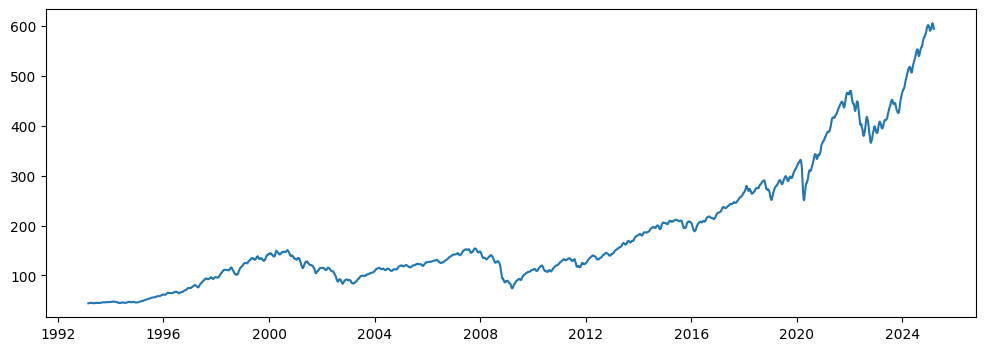

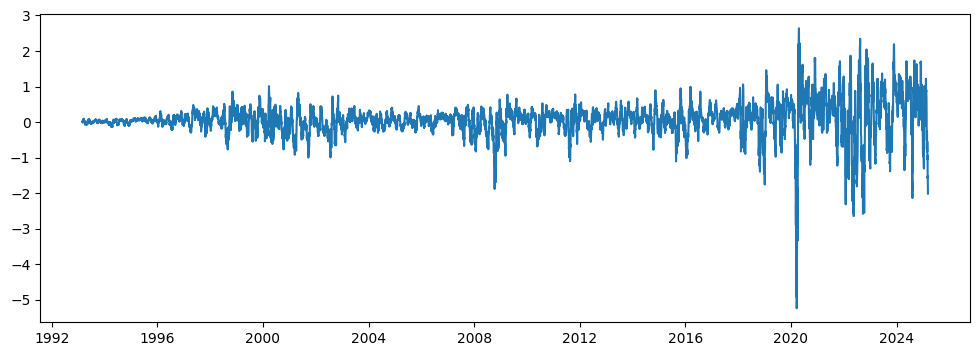

In [9]:
plt.plot(new_df['SMA(period=20,key=close)'] )
plt.show()

plt.plot(new_df['differ(ind=SMA(period=20,key=close),period=1)'] )

In [ ]:
num_samples = 1000

plt.plot(new_df['close'][-num_samples:])
plt.show()

for key in new_df.columns:
    if key in ['open', 'high', 'low', 'close', 'volume', 'vwap', 'adj_close', 'unadjusted_volume', 'change', 'change_percent']:
        continue
    plt.plot(new_df[key][-num_samples:], label=key)
    plt.title(key)
    plt.show()

In [33]:
# nan % per column
new_df.isna().sum() / len(new_df) * 100

open                      0.0
high                      0.0
low                       0.0
close                     0.0
volume                    0.0
                         ... 
vhf(period=28)            0.0
volatility(period=14)     0.0
vosc(short=12,long=26)    0.0
wad()                     0.0
willr(period=14)          0.0
Length: 75, dtype: float64

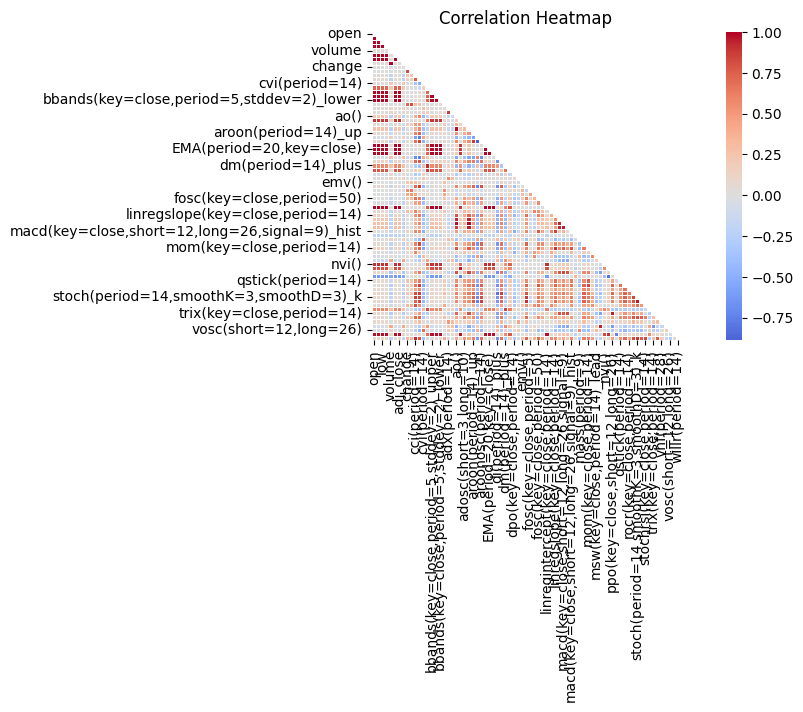

In [34]:
# plot correlation heatmap 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

corr = new_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0, annot=False, square=True, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [35]:
# zero % per column
new_df.isin([0]).sum() / len(new_df) * 100

open                      0.000000
high                      0.000000
low                       0.000000
close                     0.000000
volume                    0.000000
                            ...   
vhf(period=28)            0.346406
volatility(period=14)     0.173203
vosc(short=12,long=26)    0.309291
wad()                     0.012372
willr(period=14)          1.237164
Length: 75, dtype: float64

In [40]:
#count nans and infs
new_df.isna().sum(), new_df.isin([np.inf]).sum(), new_df.isin([-np.inf]).sum()

(open                      0
 high                      0
 low                       0
 close                     0
 volume                    0
                          ..
 vhf(period=28)            0
 volatility(period=14)     0
 vosc(short=12,long=26)    0
 wad()                     0
 willr(period=14)          0
 Length: 75, dtype: int64,
 open                      0
 high                      0
 low                       0
 close                     0
 volume                    0
                          ..
 vhf(period=28)            0
 volatility(period=14)     0
 vosc(short=12,long=26)    0
 wad()                     0
 willr(period=14)          0
 Length: 75, dtype: int64,
 open                      0
 high                      0
 low                       0
 close                     0
 volume                    0
                          ..
 vhf(period=28)            0
 volatility(period=14)     0
 vosc(short=12,long=26)    0
 wad()                     0
 willr(period=14) 

In [42]:
non_stationary_cols = ou.detect_nonstationary_columns(new_df, threshold=0.05)

Error processing column SMA(period=20,key=close): exog contains inf or nans


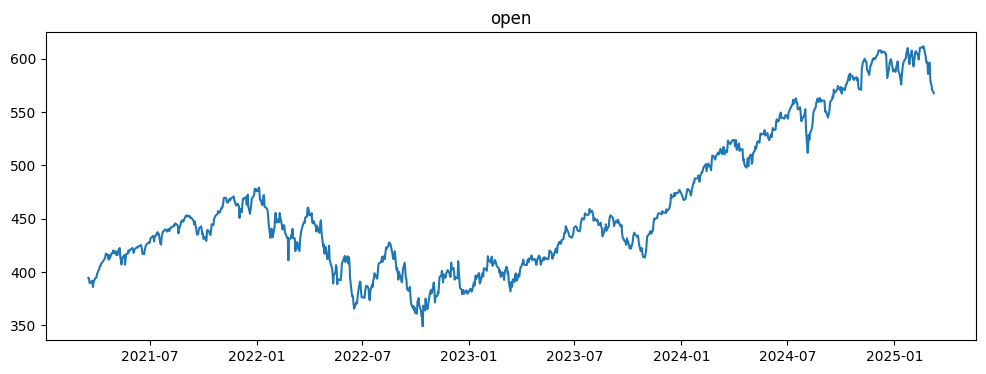

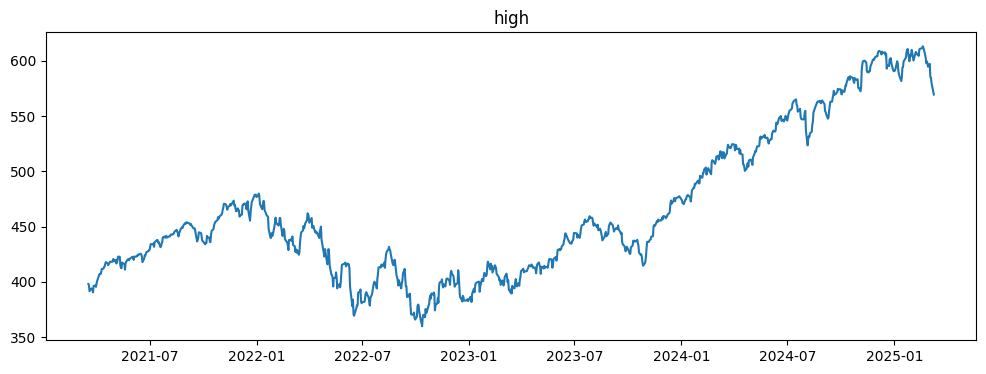

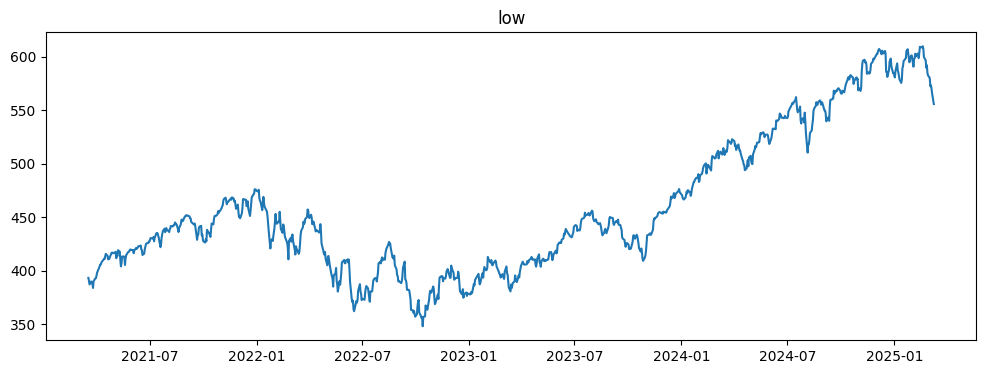

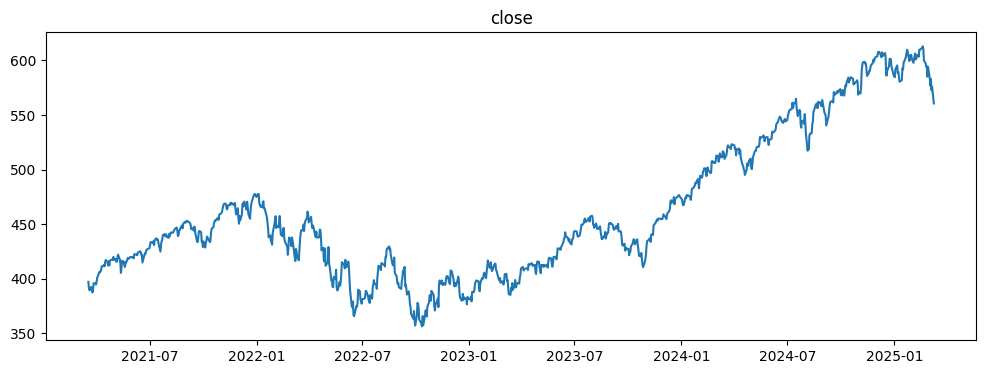

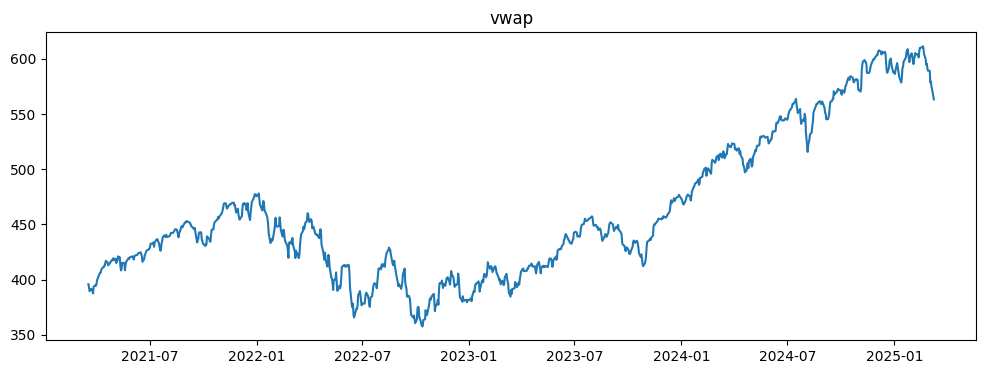

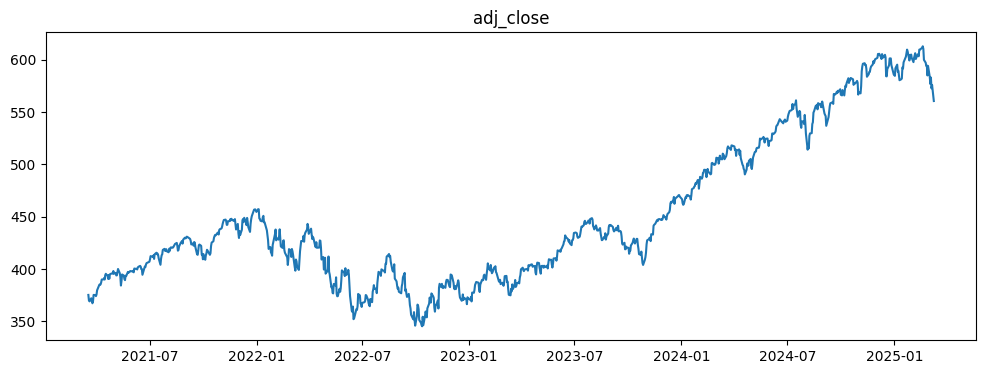

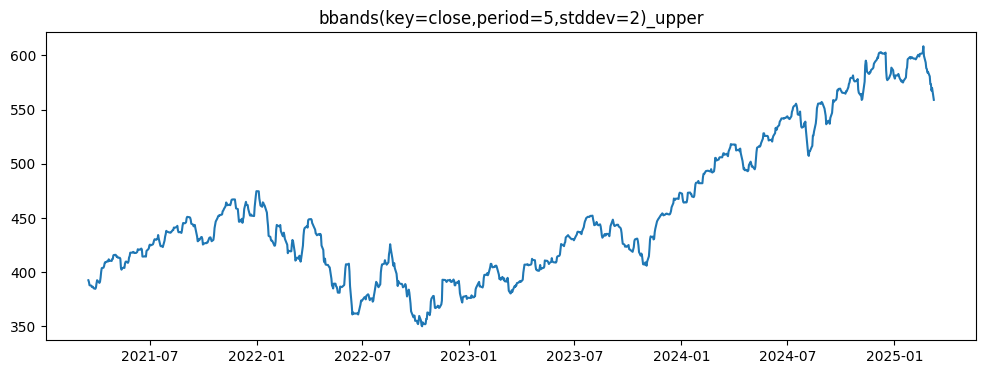

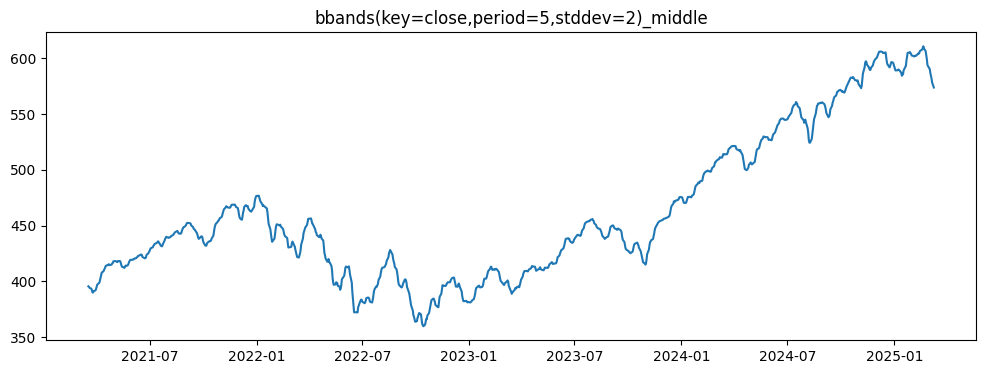

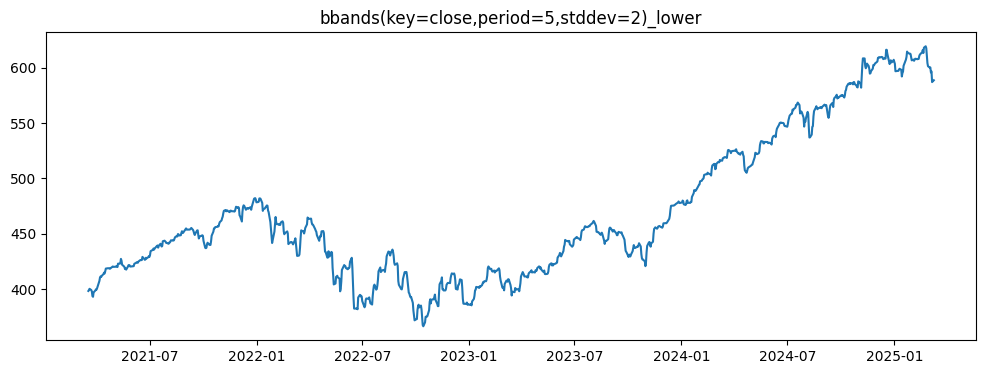

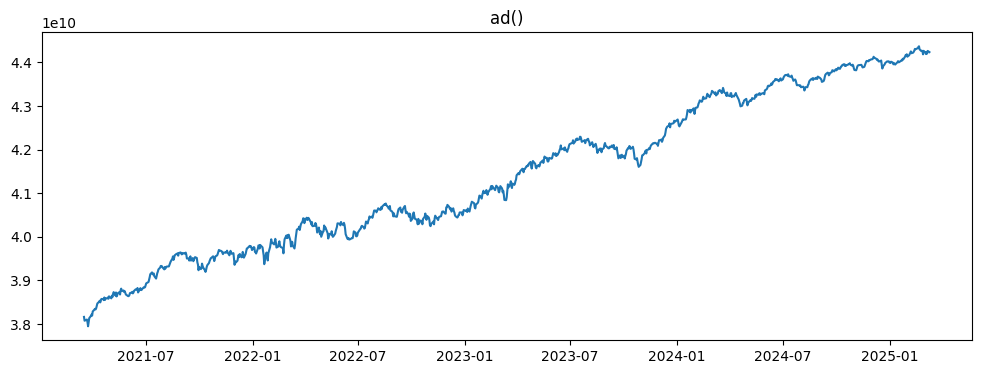

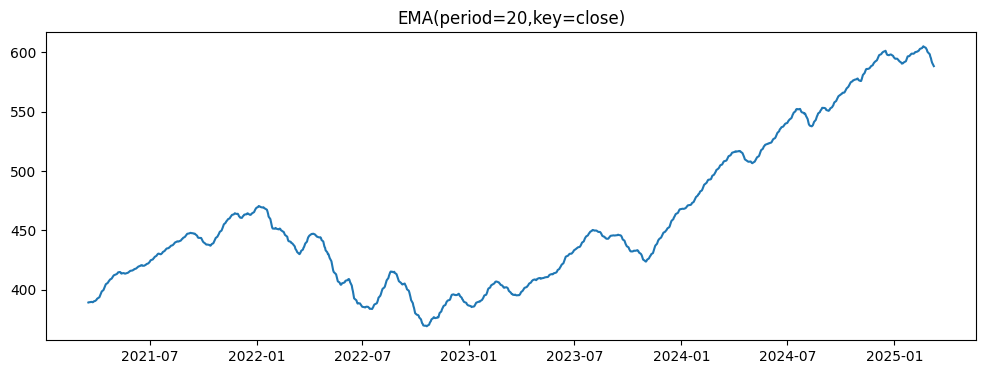

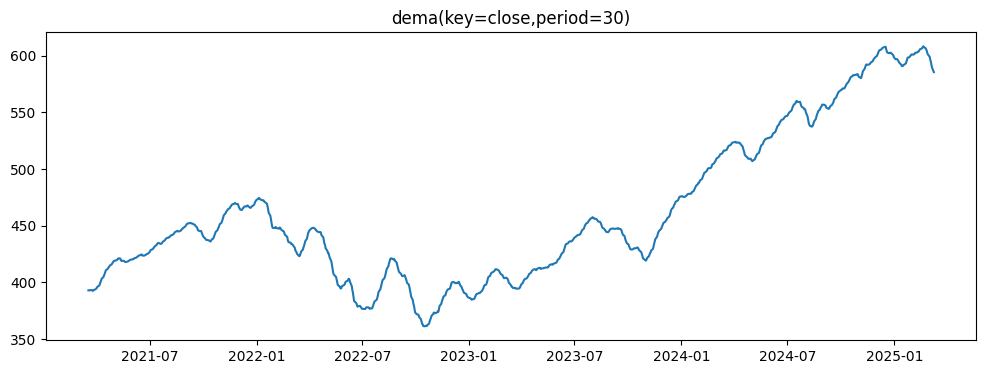

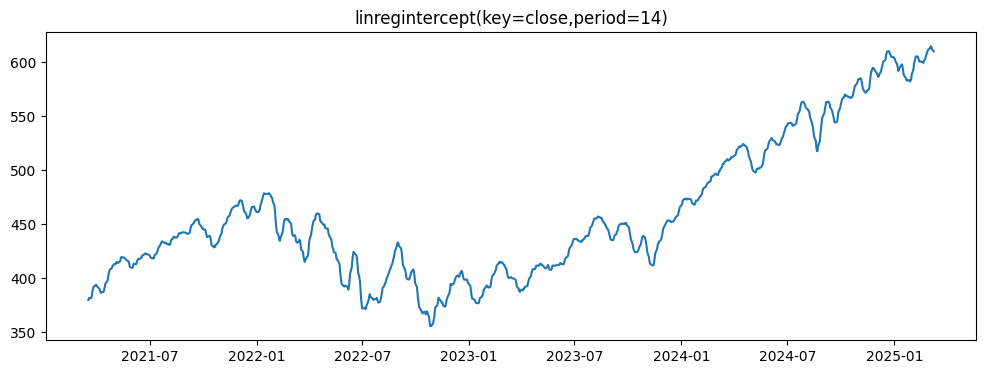

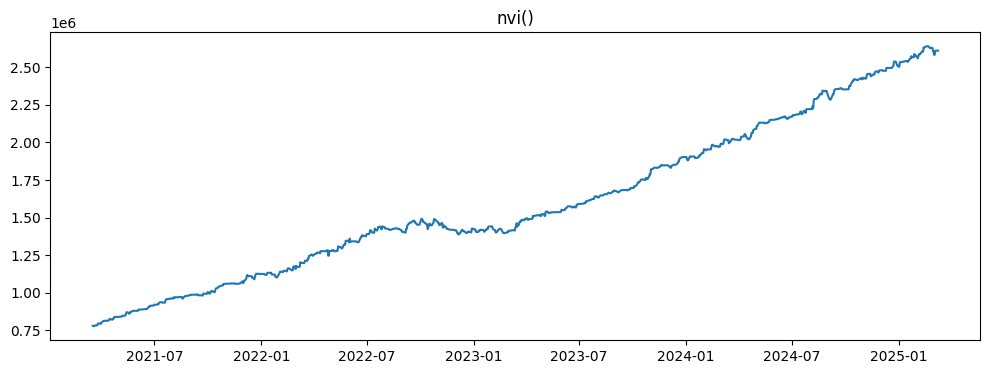

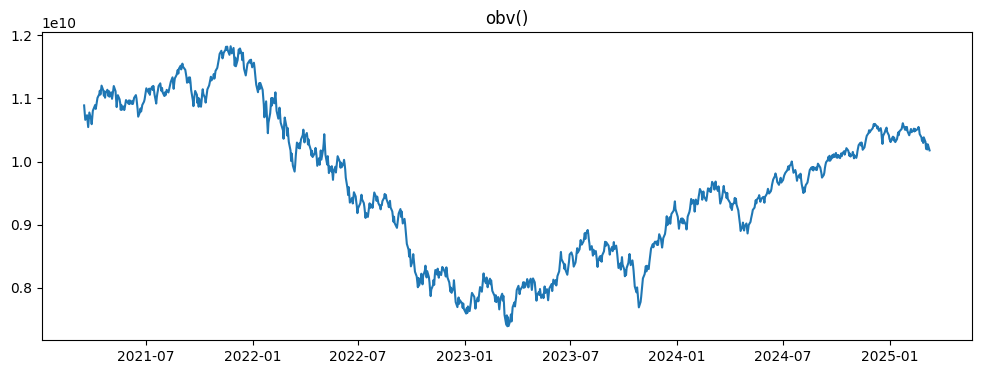

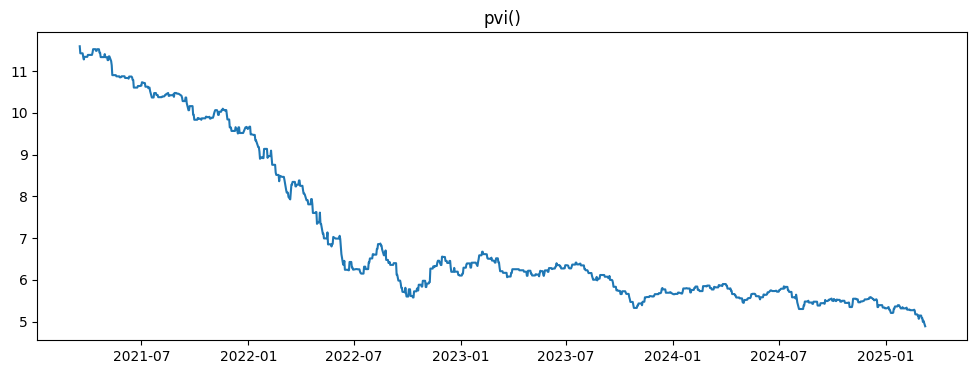

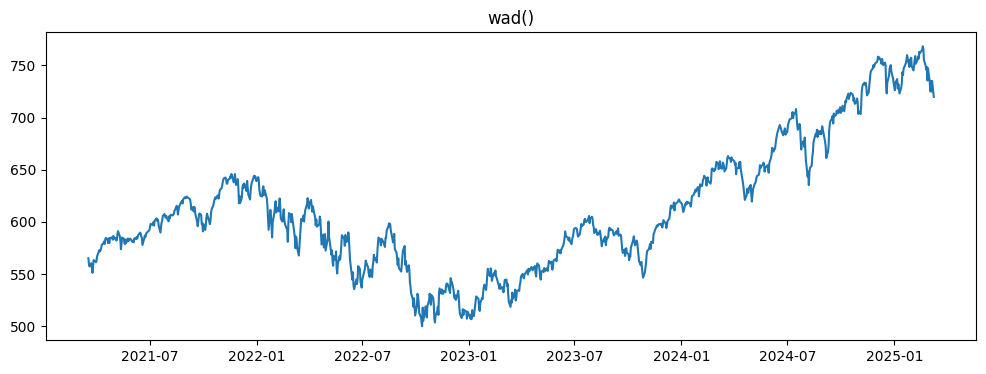

In [43]:
for col in non_stationary_cols:
    plt.plot(new_df[col][-num_samples:], label=col)
    plt.title(col)
    plt.show()

In [44]:
non_stationary_cols

['open',
 'high',
 'low',
 'close',
 'vwap',
 'adj_close',
 'bbands(key=close,period=5,stddev=2)_upper',
 'bbands(key=close,period=5,stddev=2)_middle',
 'bbands(key=close,period=5,stddev=2)_lower',
 'ad()',
 'EMA(period=20,key=close)',
 'dema(key=close,period=30)',
 'linregintercept(key=close,period=14)',
 'nvi()',
 'obv()',
 'pvi()',
 'wad()']